In [3]:
%matplotlib inline
import os
from PIL import Image
from numpy import *
from pylab import *
from skimage.color import rgb2gray
from skimage.color import gray2rgb

all_images = []
all_image_root = 'PH2Dataset/PH2 Dataset images'

#gather all images in all_image_root and store them in all_images
def gather_images():
    for dirpath, dirnames, filenames in os.walk(all_image_root):
        for filename in [f for f in filenames if ( f.endswith(".bmp") and "_" not in f  )]:
            all_images.append(os.path.join(dirpath, filename))

gather_images()
   

# Hair Removal Filter

In [4]:
from scipy.ndimage import filters
from skimage.filters import threshold_otsu

def create_mask(im):
    imx = zeros(im.shape)
    imy = zeros(im.shape)
    filters.sobel(im, 1, imx)
    filters.sobel(im, 0, imy)
    mask = sqrt(imx**2+imy**2)
    mask = mask / mask.max()
    mask = filters.gaussian_filter(mask, 4)
    thresh = threshold_otsu(mask)
    mask = mask > thresh
    return mask


def hair_removal(im, img_filter_amount=10):
    
    
    # create filtered image
    filtered = filters.median_filter(im, img_filter_amount)
    
    # create filter mask
    mask = create_mask(im)
    
    # inverse mask
    inv_mask = (1.0 - mask)
    
    comp = (im * (gray2rgb(inv_mask))) + (filtered * gray2rgb(mask))
    return comp, mask

/Users/alexandergustafson/anaconda/lib/python3.5/site-packages/skimage/filters/thresholding.py:132: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (572, 765, 3) looks like an RGB image
  warn(msg.format(image.shape))


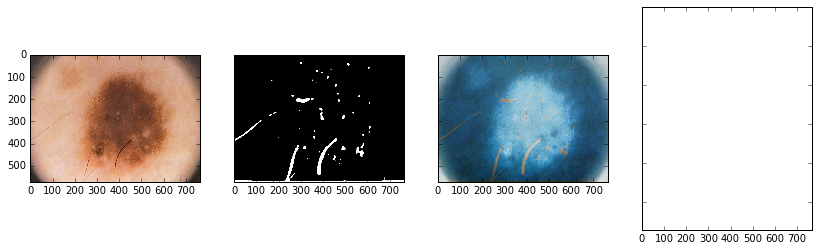

/Users/alexandergustafson/anaconda/lib/python3.5/site-packages/skimage/filters/thresholding.py:132: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (574, 765, 3) looks like an RGB image
  warn(msg.format(image.shape))


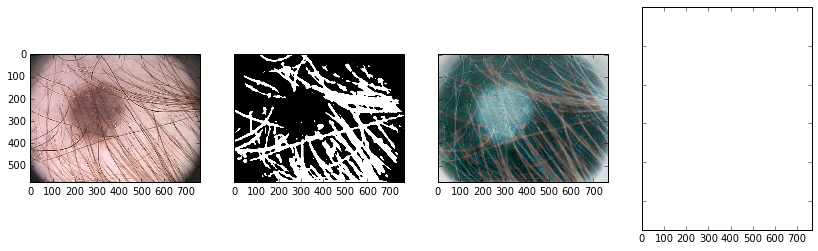

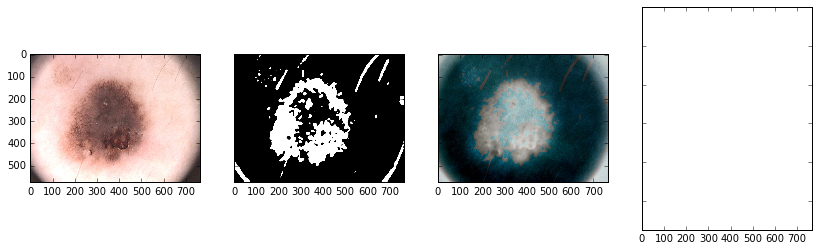

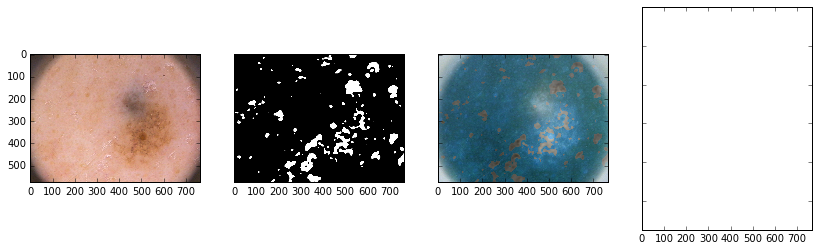

/Users/alexandergustafson/anaconda/lib/python3.5/site-packages/skimage/filters/thresholding.py:132: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (576, 766, 3) looks like an RGB image
  warn(msg.format(image.shape))


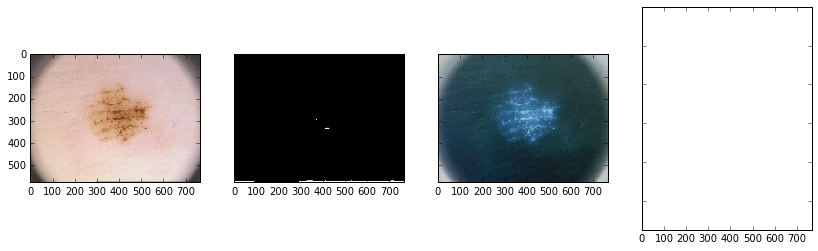

In [5]:
for i in range(5):
    im = array(Image.open(all_images[i]))
    
    comp, mask = hair_removal(im)
    
    fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})

    ax = axes[0]
    axes = axes[1:]
    ax.imshow(im)
    
    ax = axes[0]
    axes = axes[1:]
    ax.imshow(mask)
    
    ax = axes[0]
    axes = axes[1:]
    ax.imshow(comp)
    
    show()